In [54]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [7]:
df.isnull().any().any() ,df.shape

(True, (183978, 42))

In [8]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
row = df.shape[0]

In [10]:
df = df.dropna()

In [12]:
df.isnull().any().any() , df.shape

(False, (180354, 42))

In [14]:
row - df.shape[0]

3624

In [15]:
df = df.reindex(np.random.permutation(df.index))

In [16]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
146252,146253,202652,246575,2013-02-22 00:00:00,76.0,86.0,right,medium,medium,72.0,...,67.0,58.0,48.0,51.0,29.0,15.0,12.0,12.0,15.0,9.0
93735,93736,205193,282286,2013-09-20 00:00:00,73.0,84.0,left,medium,medium,51.0,...,42.0,40.0,74.0,76.0,67.0,8.0,8.0,13.0,13.0,8.0
173621,173622,8473,31435,2008-08-30 00:00:00,84.0,90.0,right,medium,low,80.0,...,88.0,90.0,39.0,49.0,61.0,6.0,22.0,79.0,22.0,22.0
20969,20970,177635,41092,2013-04-12 00:00:00,77.0,82.0,left,high,medium,83.0,...,78.0,76.0,72.0,75.0,76.0,5.0,14.0,11.0,14.0,8.0
145475,145476,199205,213317,2013-11-01 00:00:00,68.0,76.0,left,high,medium,74.0,...,69.0,59.0,59.0,69.0,69.0,7.0,13.0,13.0,8.0,6.0


In [17]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
146252,146253,202652,246575,2013-02-22 00:00:00,76.0,86.0,right,medium,medium,72.0,...,67.0,58.0,48.0,51.0,29.0,15.0,12.0,12.0,15.0,9.0
93735,93736,205193,282286,2013-09-20 00:00:00,73.0,84.0,left,medium,medium,51.0,...,42.0,40.0,74.0,76.0,67.0,8.0,8.0,13.0,13.0,8.0
173621,173622,8473,31435,2008-08-30 00:00:00,84.0,90.0,right,medium,low,80.0,...,88.0,90.0,39.0,49.0,61.0,6.0,22.0,79.0,22.0,22.0
20969,20970,177635,41092,2013-04-12 00:00:00,77.0,82.0,left,high,medium,83.0,...,78.0,76.0,72.0,75.0,76.0,5.0,14.0,11.0,14.0,8.0
145475,145476,199205,213317,2013-11-01 00:00:00,68.0,76.0,left,high,medium,74.0,...,69.0,59.0,59.0,69.0,69.0,7.0,13.0,13.0,8.0,6.0


In [18]:
df = df.reindex(np.random.permutation(df.index))

In [19]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
182956,182957,210966,356403,2014-09-18 00:00:00,57.0,67.0,left,high,medium,56.0,...,40.0,35.0,56.0,62.0,58.0,7.0,13.0,13.0,10.0,12.0
6574,6575,137460,31304,2016-01-21 00:00:00,73.0,73.0,left,medium,medium,69.0,...,72.0,68.0,20.0,27.0,22.0,13.0,9.0,12.0,10.0,9.0
120989,120990,203434,263260,2015-09-21 00:00:00,73.0,76.0,right,low,medium,58.0,...,66.0,50.0,74.0,76.0,72.0,10.0,12.0,10.0,8.0,13.0
106307,106308,176841,27568,2010-08-30 00:00:00,66.0,72.0,left,medium,medium,50.0,...,59.0,73.0,11.0,19.0,12.0,11.0,8.0,5.0,9.0,15.0
141425,141426,162275,13327,2010-08-30 00:00:00,62.0,66.0,right,high,medium,64.0,...,52.0,40.0,61.0,66.0,60.0,6.0,5.0,8.0,7.0,8.0


In [20]:
df[:10][['penalties','overall_rating']]

,penalties,overall_rating
182956,35.0,57.0
6574,68.0,73.0
120989,50.0,73.0
106307,73.0,66.0
141425,40.0,62.0
65051,50.0,64.0
22437,68.0,73.0
36879,71.0,78.0
151508,78.0,77.0
98177,53.0,48.0


In [21]:
df[:5][['attacking_work_rate','penalties','overall_rating']]

,attacking_work_rate,penalties,overall_rating
182956,high,35.0,57.0
6574,medium,68.0,73.0
120989,low,50.0,73.0
106307,medium,73.0,66.0
141425,high,40.0,62.0


In [25]:
potentialFeatures = ['acceleration','curve','free_kick_accuracy','ball_control','shot_power','stamina']

In [26]:
for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" %(f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [27]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [28]:
correlations = [df['overall_rating'].corr(df[f]) for f in cols]

In [29]:
len(cols), len(correlations)

(34, 34)

In [37]:
def plot_dataframe(df,y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    
    ax=df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotaion=75);
    plt.show()

In [43]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='yellow'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [44]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

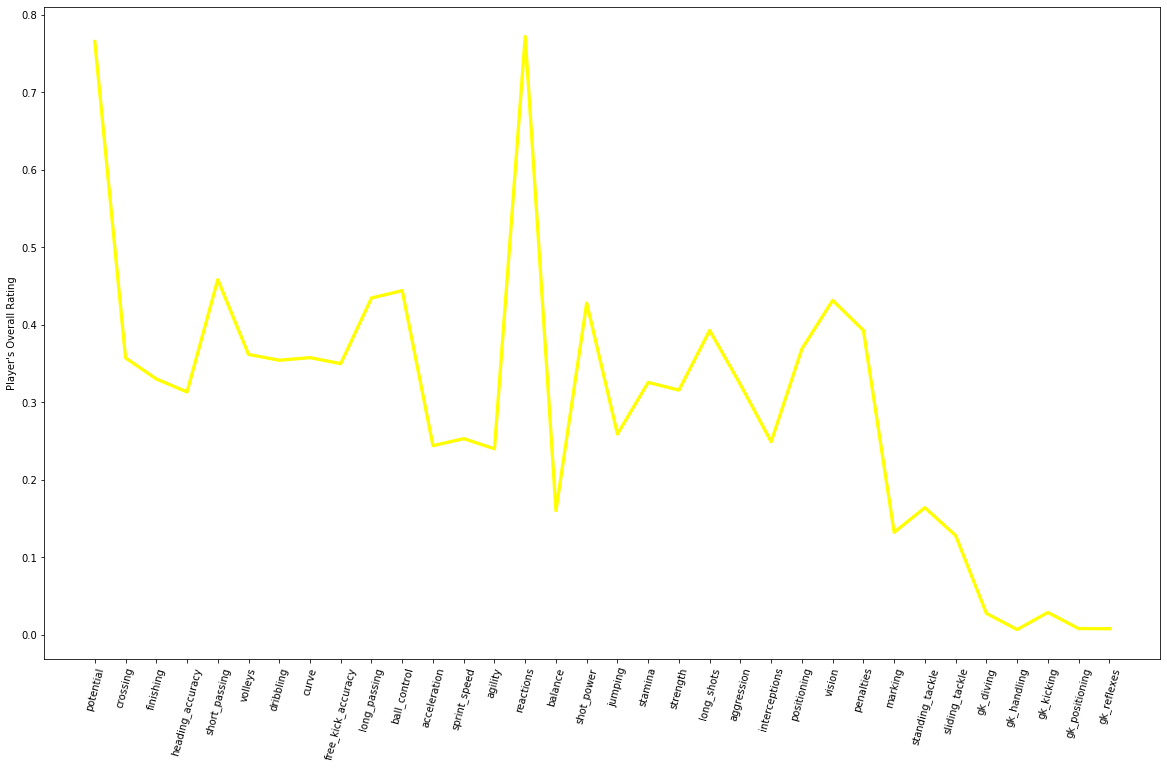

In [45]:
plot_dataframe(df2, 'Player\'s Overall Rating')

In [46]:
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [47]:
df_select = df[select5features].copy(deep=True)

In [48]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
182956,13.0,67.0,56.0,54.0,62.0
6574,12.0,73.0,20.0,14.0,27.0
120989,10.0,76.0,74.0,76.0,76.0
106307,5.0,72.0,11.0,32.0,19.0
141425,8.0,66.0,61.0,55.0,66.0


In [49]:
data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [50]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50514
1    23791
2    55900
3    50149
dtype: int64

In [51]:
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.043899,0.703603,1.027792,0.982863,1.030495,0
1,1.920720,0.039115,-1.110402,-0.651673,-1.199563,1
2,-0.477158,0.105691,-0.947790,-0.975372,-0.914274,2
3,-0.335365,-0.844613,0.548087,0.406428,0.550321,3


In [52]:
%matplotlib inline

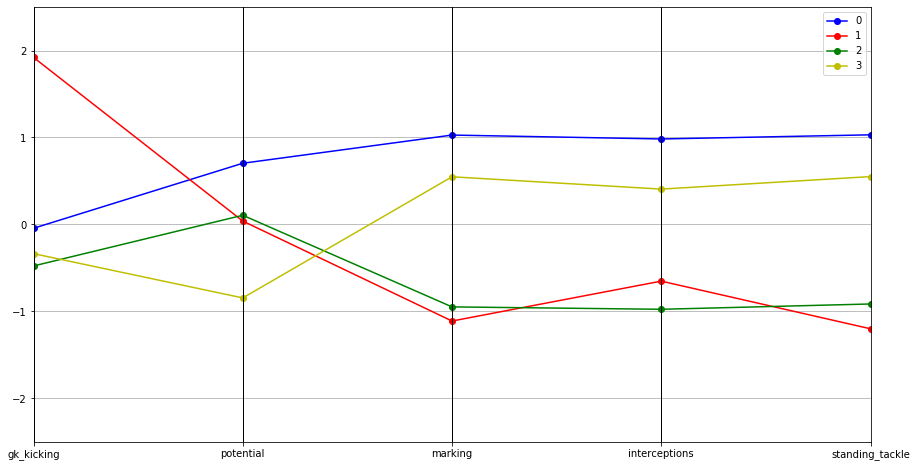

In [53]:
parallel_plot(P)